## 1. try ... except... 例外處理

In [1]:
a=1
print(a)

1


In [3]:
try:                      # 使用 try，測試內容是否正確
    a = input('輸入數字：')
    print(a + 1)
except Exception as e:                   # 如果 try 的內容發生錯誤，就執行 except 裡的內容
    print(f'發生了錯誤: {e}')
    
print('hello')

發生了錯誤: can only concatenate str (not "int") to str
hello


In [5]:
try:
    print(b)
except TypeError:
    print('型別發生錯誤')
except NameError:
    print('使用沒有被定義的對象')
print('hello')

使用沒有被定義的對象
hello


In [1]:
try:
    b=eval(input('輸入b'))
    if b>9:
        raise
    print(b)
except Exception as err:
    print(f'b>9 會出錯啦! {err}')

b>9 會出錯啦!No active exception to reraise


In [3]:
try:
    cc=int(input('輸入 1~9:'))
    if cc>10:
        raise ValueError('沒在範圍內')
    print(cc)
except ValueError as err:
    print(f"{err}")
print("繼續執行後面程式")

沒在範圍內
繼續執行後面程式


In [6]:
try:
    ddd=eval(input('輸入1~9: '))
    if ddd>10:
        assert False, '不在範圍內'
    print(ddd)
except AssertionError as err:
    print(err)
except: 
    print("好像有哪裡錯了~")
print("繼續執行後面程式")

不在範圍內
繼續執行後面程式


## 2. XX生成式, XX=[串列, 字典, 集合, 元組]
##    [str(e) for e in [串列, 字典, 集合, 元組]]

In [12]:
L='abcd'
L2=[L[e-1]+str(e) for e in range(1,5)]
print(L2)

['a1', 'b2', 'c3', 'd4']


In [18]:
a=[[10,20,30,40,50],[100,200,500,2,1]]
b=[]
c=[]
for i in a:
    MIN=min(i)
    MAX=max(i)
    b.append(MIN)
    c.append(MAX)

print(b)
print(c)

[10, 1]
[50, 500]


In [19]:
L=[i for i in range(1,10) if i%2==0]
print(L)

[2, 4, 6, 8]


In [20]:
L=[i if i%2==0 else 100 for i in range(1,10)]
print(L)

[100, 2, 100, 4, 100, 6, 100, 8, 100]


In [21]:
## dict
result={i:i*i for i in L}
print(result)

{100: 10000, 2: 4, 4: 16, 6: 36, 8: 64}


In [26]:
## set
result={i*i+1 for i in range(1,5)}
print(result)

{17, 2, 10, 5}


In [41]:
## tuple 要這樣用:
result=tuple(i for i in range(1,9))
print(result)


# 下面這樣()變成 generator: 需要調用 .__next__() 才會依序取值出來
result=(str(i) for i in range(1,9))
print(type(result.__next__()))
print(result.__next__())
print(result.__next__())



(1, 2, 3, 4, 5, 6, 7, 8)
<class 'str'>
2
3


## 3. 產生器 generator
- 產生器是記錄「產生值的方法」，而不是記錄值。
- 使用產生器中「產生的值只能取用一次」，無法重新啟動或重新取得 ( 因為不會紀錄 )。

In [60]:
a = [i for i in range(10)]  # 串列生成式
b = (i for i in range(10))  # 產生器表示式
print(a)   # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print(b)   # <generator object <genexpr> at 0x7fbb6facba50>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
<generator object <genexpr> at 0x0000020CEF689E00>


In [61]:
for ii in range(1,11):
    print(next(b))

0
1
2
3
4
5
6
7
8
9


In [78]:
def f(max):
    n=0
    a=2
    while(n<max):
        yield(a)
        a=a**2
        n+=1

print(f(5))

<generator object f at 0x0000020CEF6A80B0>


In [79]:
g=f(5)
# 此時的 g 相當於 
# def f(5)
#     n=0
#     a=2
#     while(n<5):
#         yield(a)
#         a=a**2
#         n+=1

In [81]:
print(next(g))

4


In [82]:
a=range(2,100)
print(*a)

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99


In [88]:
g=f(5)

print(*g) ## 相當於解開產生器... 一次倒出來產生器的結果

2 4 16 256 65536


In [89]:
def prime(max):                   # 定義一個 gg 函式
    s = set()                    # 設定一個空集合
    for n in range(2,max):       # 從 range(2, max) 當中開始依序找質數
        if all(n%i>0 for i in s):  # 判斷如果 i 已經存在於集合，且除以集合中的值會有餘數 ( 整除表示非質數 )
            s.add(n)                 # 將該數字加入集合 ( 表示質數 )
            yield n                  # 使用 yield 記錄狀態
print(*prime(100))                # 印出結果

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97


## 4. Class複習


In [2]:
class human():
    def __init__(self):
        self.eye=2
        self.ear=2
        self.nose=1
        self.mouth=1
    
    def say(self,msg):
        print(msg)
        return msg
    
    def play(self,thing):
        print(f"I'm playing {thing}")
        return thing
    
    def xfile(kkk, mmm):
        ## 實驗一下如果第一個引數沒有寫 self, 改成 kkk會如何?
        print(kkk,mmm) 

me=human()
me.say('hello')
me.play('ball')
me.xfile('?')

hello
I'm playing ball
<__main__.human object at 0x000002B721D77B50> ?


In [3]:
## 外部 實例化後添加的屬性:
me.hand=2
me.leg=2
me.name='justin'

print(me.hand)
print(me.leg)
print(me.name)

2
2
justin


In [4]:
## 實例化後複寫 override method/屬性
me.play='???'
print(me.play)

???


In [110]:
## 實例化後複寫 __init__ 有沒有意義跟作用?
me.__init__='??????'
print(me.nose)



1
None


### 類別裡有些屬性不希望被外部更動，就能夠使用 @property 的裝飾器，將該屬性設為唯讀屬性

In [6]:
class human2():
    
    def __init__(self):
        self.eye=2
        self.ear=2
        self.nose=1
        
        self.mouth=1
    
    @property
    def say(self,msg):
        print(msg)
        return msg
    
    def play(self,thing):
        print(f"I'm playing {thing}")
        return thing
    
    def xfile(kkk, mmm):
        ## 實驗一下如果第一個引數沒有寫 self, 改成 kkk會如何?
        print(kkk,mmm) 

In [10]:
you=human2()
you.say('1111')


TypeError: human2.say() missing 1 required positional argument: 'msg'

### 繼承中的方法複寫

In [19]:
class Parent():
    def __init__(self):
        self.eye=2
        self.ear=2
        self.nose=1
        self.leg=2


class Child(Parent):
    def __init__(self):
        self.hand=3

oxxo=Child()
# print(oxxo.eye) ## 這樣會噴錯, 因為 child的 __init__ override了 parent的 __init__,

class Child2(Parent):
    def __init__(self):
        super().__init__() ## 這樣 Child2就繼承了 Parent的屬性/方法,
        self.tail=1

xoox=Child2()
print(xoox.ear)

2


In [2]:
class grandpa():
    def __init__(self):
        self.mouth=1
    def __money(self): ## 私有方法
        print('$1000')
    def getMoney(self):
        self.__money()

class father(grandpa):
    def skill(self):
        print('painting')

class son(father):
    def play(self):
        print('football')

oxxo=son()

# oxxo.__money() ## son存取不到 grandpa的私有方法! 噴錯!
oxxo.getMoney()

$1000


## 5. import

In [24]:
import mod1

In [26]:
mod1.talk()

Hello! this is mod1.py, and you r calling talk() function!


(True, 'Hello! this is mod1.py, and you r calling talk() function!')

## 6. 匿名函數
### lambda

In [27]:
#傳統的函數
def hello(title):
    print(title)

hello('你的名字')

你的名字


In [4]:
#匿名函數
foo = lambda title: print(title)

foo('我的名字2')

我的名字2


In [5]:
#多參數 + if 的匿名函數寫法:
bar = lambda x,y: 5*x+2*(y if y>10 else y-10)

bar(5,9)

23

In [6]:
# 搭配 for loop
def x(n):
    a=list(range(n))
    return a
print(x(5)) ## 傳統呼叫函數

y=lambda n: [i for i in range(n)]
print(y(5)) ## 用匿名函數

L=[j for j in range(5)]
print(L)    ## 用串列生成式

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [40]:
## 搭配 map的方法
a=list(range(1,11))
func=lambda x: x*x
b=map(func,a) ## map物件是 iterable,

# 回憶一下 3. 的產生器的取值方式
print(b) 
print(next(b))
print(*b)
print(list(b)) # @@ 前面都 pop完了, 即使是 list()也轉出空值


1
4 9 16 25 36 49 64 81 100
[]


In [41]:
## 搭配 filter的方法
c=list(range(1,11))
func2=lambda x: x>5
d=filter(func2, c)
print(d)
print(*d)

6 7 8 9 10


In [47]:
## 搭配 sorted
a=[[2,1],[4,3],[3,8],[6,5],[-5,9],[7,1]]
b=sorted(a, key=lambda x:x[1])
print(b)

[[2, 1], [7, 1], [4, 3], [6, 5], [3, 8], [-5, 9]]


## 7. 函數引數 *args, **kwargs

## 8. 裝飾器
### 裝飾器本質上是一個 Python 函式或類 ( class )，它可以讓其他函式或類，在不需要做任何代碼修改的前提下增加額外功能，裝飾器的返回值也是一個函式或類對象

In [51]:
def a(func):
    print('makeup...')
    return func

def b():
    print('go!!!!')

b = a(b)
b()


makeup...
go!!!!


In [52]:
def a(func):
    print('makeup...')
    return func

# 裝飾器寫在 b 的前面，表示裝飾 b
@a 
def b(): ## 相當於先把 b() 塞給 a(...) => 再賦值給 b, 
    print('go!!!!')

## 後續呼叫 b() 就連同 a的功能一起執行
b() 
# makeup...
# go!!!!

makeup...
go!!!!


In [55]:
def aa(func):
    def c(m):
        print('makeup....')
        return func(m)
    return c

@aa
def b(msg):
    print(msg)

print(b('Go!'))


makeup....
Go!
None


In [58]:
#帶參數的用法:
def a(func):
    def c(*args, **kwargs):
        print(args)
        print(kwargs)
        print('ok...')
        return func(*args, **kwargs)
    def d(*args,**kwargs):
        print(args)
        print('ok...')
        return func(*args)
    return d

@a
def b(*args, **kwargs):
    print('go!!!!')

b([1,2,3,4,56], x=1, y=2, z=3)

# ([123, 456],)
# {'x': 1, 'y': 2, 'z': 3}
# ok...
# go!!!!

([1, 2, 3, 4, 56],)
ok...
go!!!!


## 9. 閉包 closure
### 閉包可以保存在函式作用範圍內的狀態，不會受到其他函式的影響，
### 且無法從其他函式取得閉包內的資料，也可避免建立許多全域變數互相干擾。

In [65]:
def a(msg):
    i="!@#$"
    def b():
        print(msg+i)
    return b
a("hello") ## 會印出 <function __main__.a.<locals>.b()> <= 傳回的是: main底下的 a函數裏頭的 b函數().

<function __main__.a.<locals>.b()>

In [68]:
def count():
    a=[]
    def avg(val):
        a.append(val)
        print(f"a= {a}")
        return sum(a)/len(a)
    return avg

test=count()
test(10)
test(11)
test(12)

a= [10]
a= [10, 11]
a= [10, 11, 12]


11.0

## 10. 迭代物件轉換


In [76]:
aiter=iter([i for i in range(10)])
print(next(aiter))
for i in range(3):
    print(f"跑第{i}次, aiter next取值 = {next(aiter)}")
print("用 *解開 aiter= ",*aiter)


0
跑第0次, aiter next取值 = 1
跑第1次, aiter next取值 = 2
跑第2次, aiter next取值 = 3
用 *解開 aiter=  4 5 6 7 8 9


## 11. 迭代物件操作

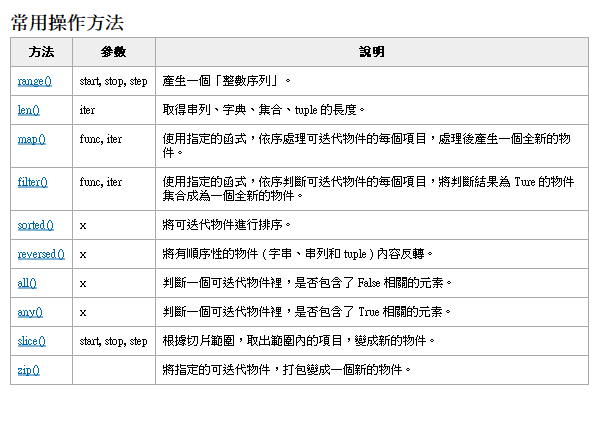

In [80]:
a=list(range(-4,10))
b=filter(lambda x: x*x, a)
print(list(b)) ## <= filter的話 非 0的就是 true, 所以 0會被過濾掉,

[-4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [82]:
a=[i for i in range(10)]
print(all(a)) ## a=[0,1,2,3,...,9] 因為包含 0(False), 所以 all(a)回傳 False,

b=[e for e in range(1,10)]
print(all(b)) ## b=[1,2,3,...,9] 沒有包含 0(False), 所以 all(b)回傳 True, 

## 因此 all(x) 相當於 x做 AND運算,


False
True


In [84]:
## 所以承上概念 any(x) 是 x中只要有不為0 (True), 相當於 OR運算,
print(any(a))
print(any(b))

True
True


In [90]:
## zip() 打包, 一定要會用!
## 以元素少的(短的)為主,打包成 tuple

a=[1,2,3,4]
b=[5,6,7,8]

c=[9,10,11]

test1 = zip(a,b)
print(*test1)

test2 = zip(a,c)
print(*test2)

test3 = zip(c,b)
print(*test3)

(1, 5) (2, 6) (3, 7) (4, 8)
(1, 9) (2, 10) (3, 11)
(9, 5) (10, 6) (11, 7)
